In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### Read in data

In [2]:
data = pd.read_csv(r"C:\Users\johnl\Documents\forest-cover-type-prediction\train.csv")

## Overview of data

### Data Shape

In [3]:
data.shape

(15120, 56)

### Data Head

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


### Data Statistics

In [5]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Data Var, Skew and  Kurtosis

In [6]:

def describe_advanced(df):
    stats = df.describe()
    stats.loc['var'] = df.var().tolist()
    stats.loc['skew'] = df.skew().tolist()
    stats.loc['kurt'] = df.kurtosis().tolist()
    return stats
describe_advanced(data)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,1.512000e+04,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,1.512000e+04,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7.560500e+03,2749.322553,156.676653,16.501587,227.195701,51.076521,1.714023e+03,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4.364912e+03,417.678187,110.085801,8.453927,210.075296,61.239406,1.325066e+03,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.000000e+00,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000e+00,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.780750e+03,2376.000000,65.000000,10.000000,67.000000,5.000000,7.640000e+02,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7.560500e+03,2752.000000,126.000000,15.000000,180.000000,32.000000,1.316000e+03,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.134025e+04,3104.000000,261.000000,22.000000,330.000000,79.000000,2.270000e+03,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,1.512000e+04,3849.000000,360.000000,52.000000,1343.000000,554.000000,6.890000e+03,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
var,1.905246e+07,174455.068186,12118.883667,71.468878,44131.629864,3750.264863,1.755801e+06,933.992256,519.929633,2106.368347,...,0.043555,0.039084,0.001453,0.006701,0.000661,0.002244,0.045833,0.041567,0.029438,4.000265
skew,0.000000e+00,0.075640,0.450935,0.523658,1.488052,1.537776,1.247811e+00,-1.093681,-0.953232,-0.340827,...,4.354839,4.646742,26.161230,12.052838,38.849712,21.018939,4.221771,4.479186,5.475256,0.000000


### Data Info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

### Data column data types

In [8]:
data.dtypes


Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

### Check for Missing data

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 56 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


We have no missing values which is great

In [10]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


# Exploratory Data Analysis

AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5, 1.0, 'Cover Type')

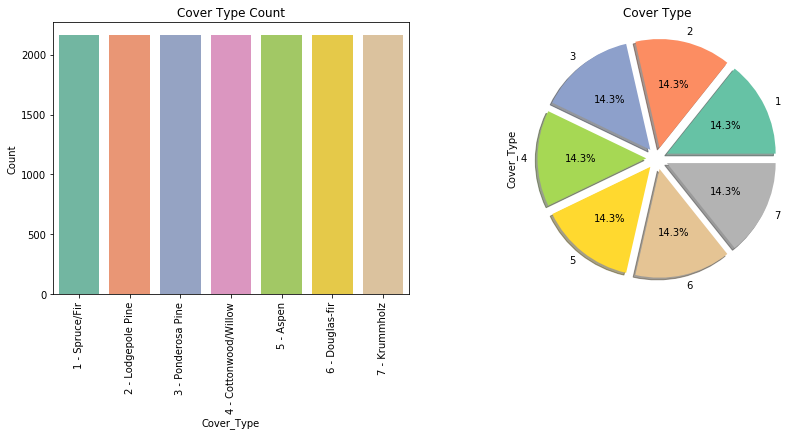

In [11]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
print(ax[1])
sns.countplot(data=data, x='Cover_Type', ax=ax[0],palette='Set2')


a=ax[0].get_xticks().tolist()

a[0] = '1 - Spruce/Fir'
a[1] = '2 - Lodgepole Pine'
a[2] = '3 - Ponderosa Pine'
a[3] = '4 - Cottonwood/Willow'
a[4] = '5 - Aspen'
a[5] = '6 - Douglas-fir'
a[6] = '7 - Krummholz'
ax[0].set_xticklabels(a, rotation = 90)
#ax[0].set_xlabel( '1 - Spruce/Fir, 2 - Lodgepole Pine, 3 - Ponderosa Pine, 4 - Cottonwood/Willow, 5 - Aspen, 6 - Douglas-fir, 7 - Krummholz')
ax[0].set_ylabel("Count")
ax[0].set_title("Cover Type Count")
data['Cover_Type'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap = "Set2")
plt.title("Cover Type")


Our data is split evenly for each classifcation 

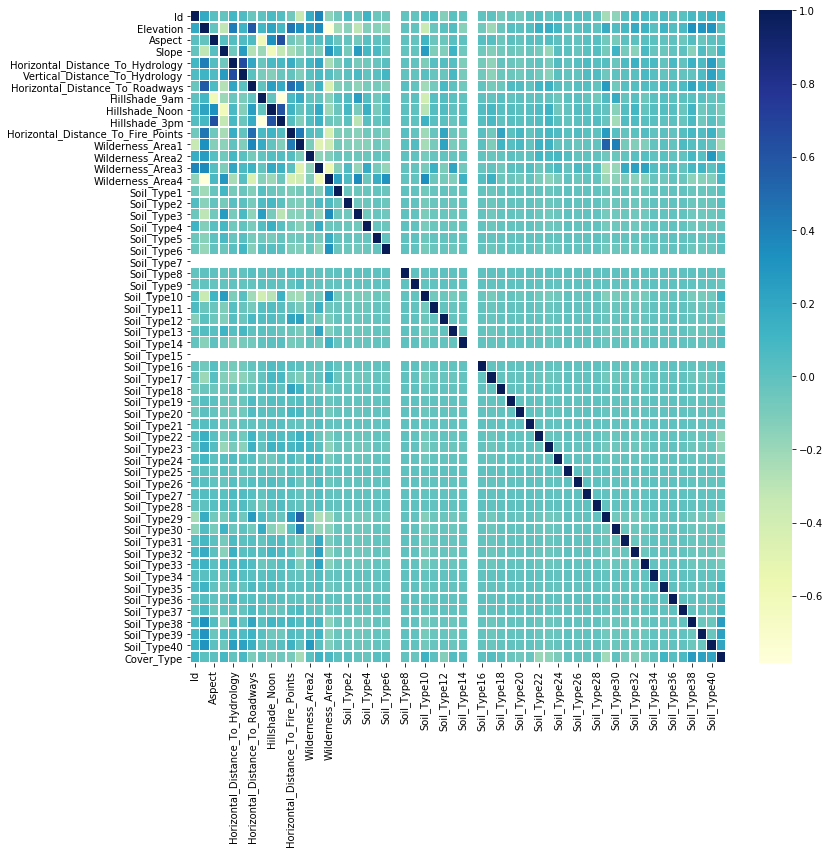

In [12]:
def corr_mat(df,annot = False):
    corrmat = data.corr()
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(corrmat,
                     annot=annot,
                     linewidths=0.5,
                     fmt=".2f",
                     cmap="YlGnBu");
    bottom, top = ax.get_ylim()
corr_mat(data)

In [13]:
def corr_mat(df,annot = False):
    corrmat = data.corr()
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(corrmat,
                     annot=annot,
                     linewidths=0.5,
                     fmt=".2f",
                     cmap="YlGnBu");
    bottom, top = ax.get_ylim()


In [14]:
size = 10 

#create a dataframe with only 'size' features
data_corr=data.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data_corr.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


### High Correlation Scatter Plots

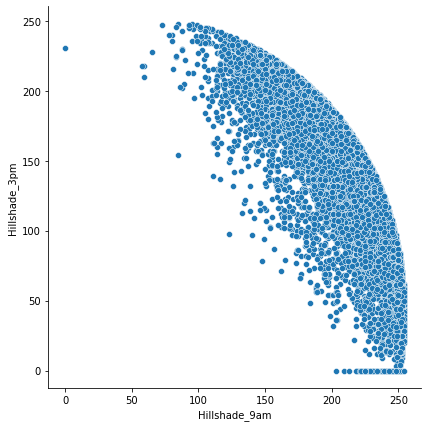

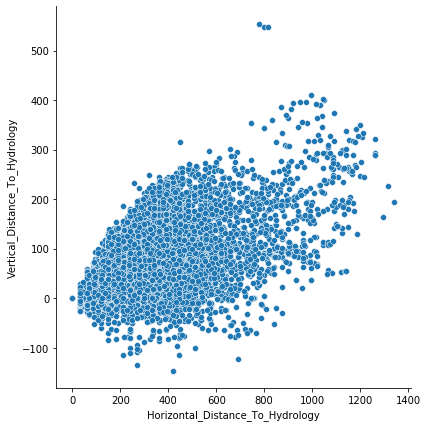

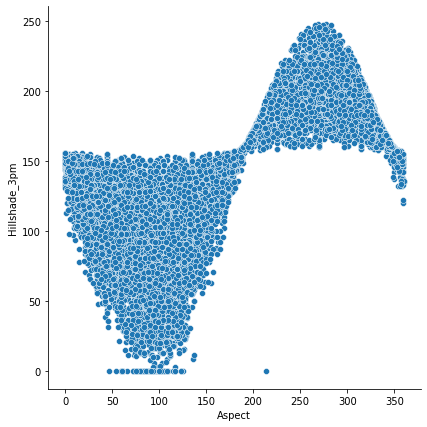

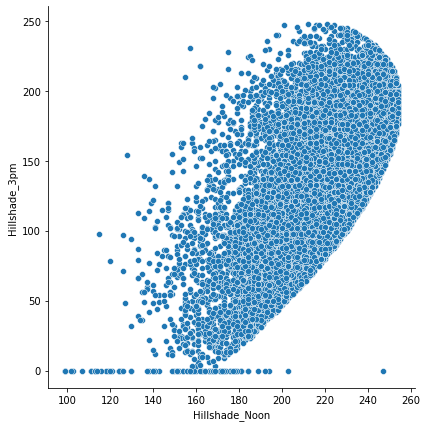

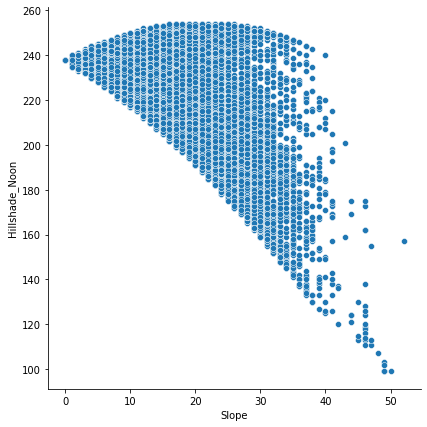

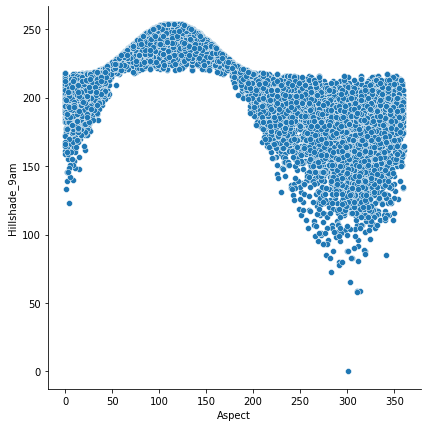

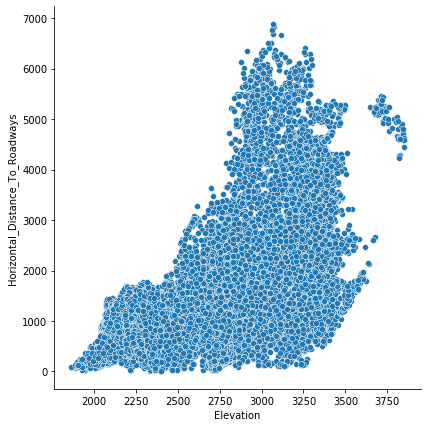

In [15]:
for v,i,j in s_corr_list:
    sns.pairplot(data, height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()


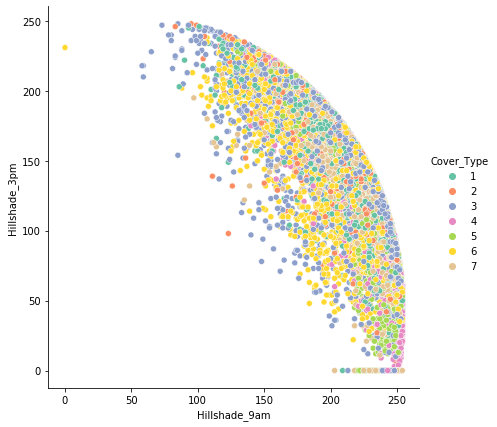

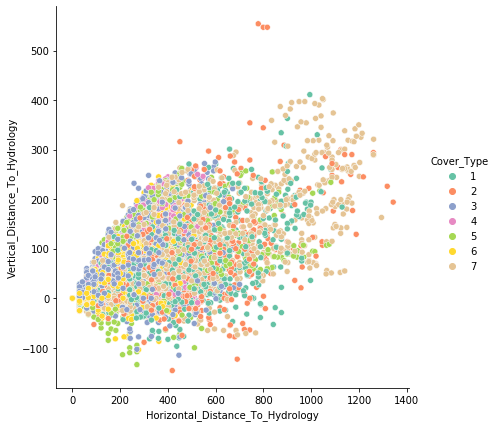

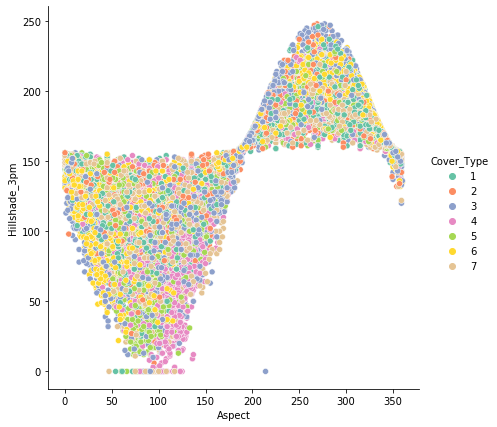

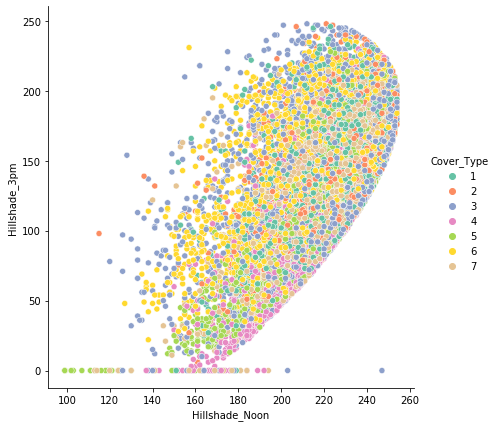

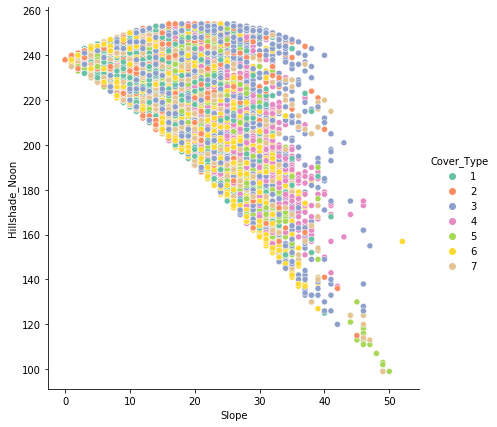

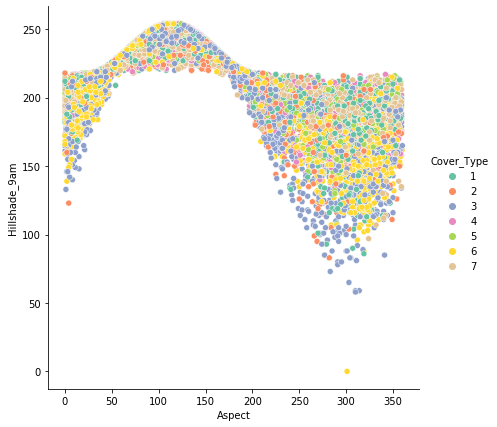

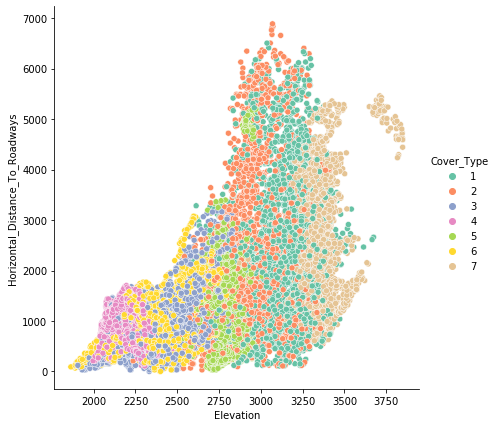

In [16]:
for v,i,j in s_corr_list:
    sns.pairplot(data, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j],palette="Set2" )
    plt.show()

In [17]:
print(corr_list)

[[0.5786589907340086, 1, 6], [-0.593997428131315, 2, 7], [0.6350223640198747, 2, 9], [-0.6126128724172818, 3, 8], [0.6521424712357421, 4, 5], [-0.7799647424475467, 7, 9], [0.6145263872475751, 8, 9]]


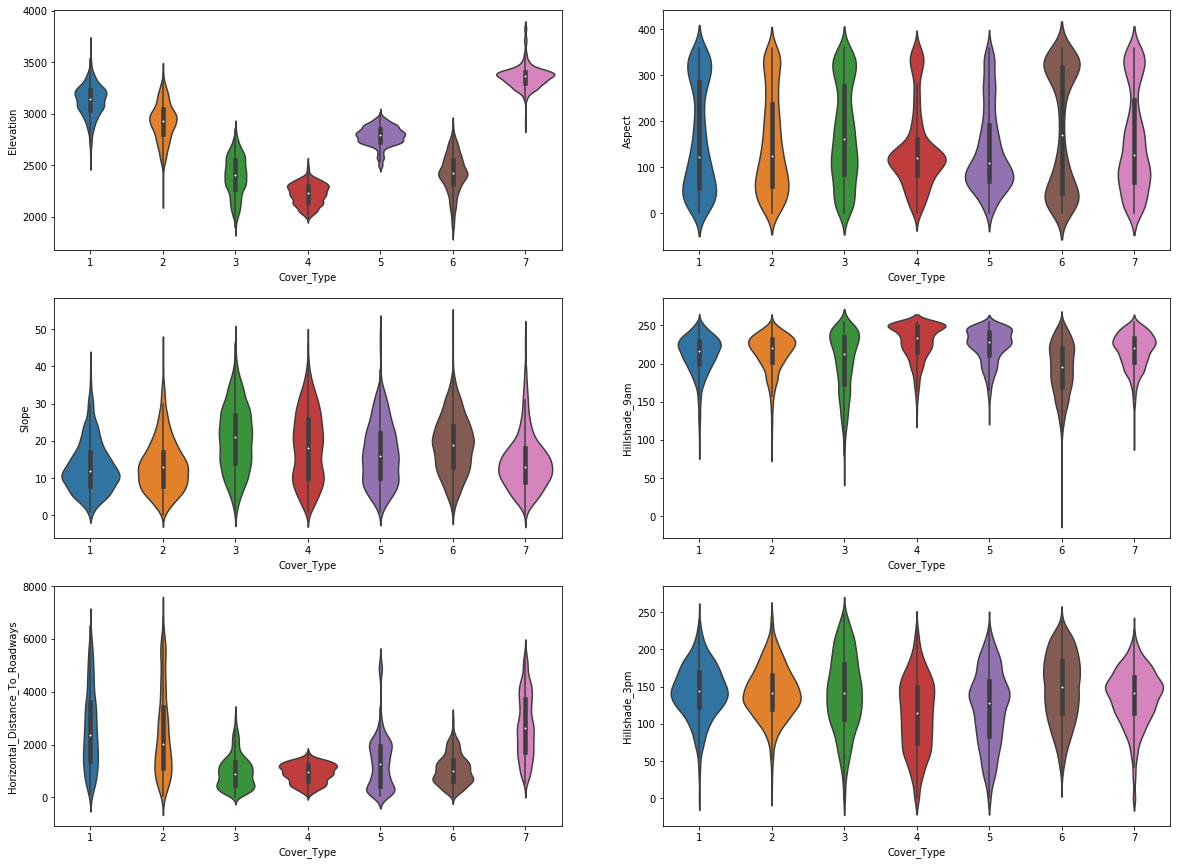

In [18]:
fig,ax=plt.subplots(3, 2, figsize = (20,15))

sns.violinplot(data=data,x="Cover_Type",y="Elevation",ax= ax[0][0])  
sns.violinplot(data=data,x="Cover_Type",y="Aspect",ax= ax[0][1])  
sns.violinplot(data=data,x="Cover_Type",y="Slope",ax= ax[1][0])
sns.violinplot(data=data,x="Cover_Type",y="Hillshade_9am",ax= ax[1][1])
sns.violinplot(data=data,x="Cover_Type",y="Horizontal_Distance_To_Roadways",ax= ax[2][0])
sns.violinplot(data=data,x="Cover_Type",y="Hillshade_3pm",ax= ax[2][1])


- Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
- Aspect contains a couple of normal distribution for several classes
- Hillshade 9am displays left skew
- Hillshade 3pm is normal
- Lots of 0s in vertical distance to hydrology

## Catagorical Data

In [19]:
print(data.apply(lambda col: col.unique()))

Id                                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Elevation                             [2596, 2590, 2804, 2785, 2595, 2579, 2606, 260...
Aspect                                [51, 56, 139, 155, 45, 132, 49, 59, 201, 151, ...
Slope                                 [3, 2, 9, 18, 6, 7, 4, 10, 11, 22, 1, 5, 17, 2...
Horizontal_Distance_To_Hydrology      [258, 212, 268, 242, 153, 300, 270, 234, 240, ...
Vertical_Distance_To_Hydrology        [0, -6, 65, 118, -1, -15, 5, 7, 56, 11, 51, 26...
Horizontal_Distance_To_Roadways       [510, 390, 3180, 3090, 391, 67, 633, 573, 666,...
Hillshade_9am                         [221, 220, 234, 238, 230, 222, 223, 228, 218, ...
Hillshade_Noon                        [232, 235, 238, 234, 237, 225, 230, 221, 219, ...
Hillshade_3pm                         [148, 151, 135, 122, 150, 140, 138, 144, 133, ...
Horizontal_Distance_To_Fire_Points    [6279, 6225, 6121, 6211, 6172, 6031, 6256, 622...
Wilderness_Area1                

We can see that Wilderness_Area and Soil_Type are catagorical in nature, we also see that we can drop Soil_Type7 and Soil_Type15 as they only have the value 0 and thus provide no meaningful data

## Data Cleaning

### Drop useless columns
We can drop Id, Soil_Type7 and Soil_Type15 as they will not provide anything to our model

In [20]:
data.drop(['Id', 'Soil_Type7','Soil_Type15'],axis=1,inplace=True)

### Scaling Data

In [21]:
x_numeric = data.iloc[: , :10]
x_catagorical = data.iloc[:, 10:]

In [22]:
#Split the data into chunks
X = data.drop("Cover_Type",axis=1)
y= data["Cover_Type"]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#Standardized
#Apply transform only for non-categorical data
scale =  StandardScaler()
X_train[X_train.columns] = scale.fit_transform(X_train) 
X_val[X_val.columns] = scale.fit_transform(X_val)




C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\johnl\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = data.drop("Cover_Type",axis=1)
y= data["Cover_Type"]

X[X.columns] = scale.fit_transform(X) 
y.head()
data_con = pd.concat([X,y], axis=1)
data_con.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [24]:
r, c = data.shape

#get the list of columns
cols = data.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = data.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y = array[:,(c-1)]


X = data.drop("Cover_Type",axis=1)
y= data["Cover_Type"]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


#Standardized
#Apply transform only for non-categorical data
scale =  StandardScaler()
X_train[X_train.columns] = scale.fit_transform(X_train) 
X_val[X_val.columns] = scale.fit_transform(X_val)


#MinMax
#Apply transform only for non-categorical data
scale =  MinMaxScaler()
X_train[X_train.columns] = scale.fit_transform(X_train) 
X_val[X_val.columns] = scale.fit_transform(X_val)


#Normalize
#Apply transform only for non-categorical data
scale =  Normalizer()
X_train[X_train.columns] = scale.fit_transform(X_train) 
X_val[X_val.columns] = scale.fit_transform(X_val)


C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\johnl\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

Elevation, Score: 0.2948529050438622
Aspect, Score: 0.0340155375840269
Slope, Score: 0.022714303130632153
Horizontal_Distance_To_Hydrology, Score: 0.057642730781917194
Vertical_Distance_To_Hydrology, Score: 0.02864861683110139
Horizontal_Distance_To_Roadways, Score: 0.0922815454800046
Hillshade_9am, Score: 0.03268110145147988
Hillshade_Noon, Score: 0.02306080922080339
Hillshade_3pm, Score: 0.020534567195318747
Horizontal_Distance_To_Fire_Points, Score: 0.08101619067654574
Wilderness_Area1, Score: 0.028046675345541835
Wilderness_Area2, Score: 0.00523128529515358
Wilderness_Area3, Score: 0.02271007439400055
Wilderness_Area4, Score: 0.0050024311704767194
Soil_Type1, Score: 0.0008765950449842052
Soil_Type2, Score: 0.0032360291466290644
Soil_Type3, Score: 0.001327215511225181
Soil_Type4, Score: 0.005731427909141402
Soil_Type5, Score: 0.0011787429673235379
Soil_Type6, Score: 0.00048407523631141335
Soil_Type8, Score: 0.0
Soil_Type9, Score: 0.0
Soil_Type10, Score: 0.01037130973191312
Soil_Type

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


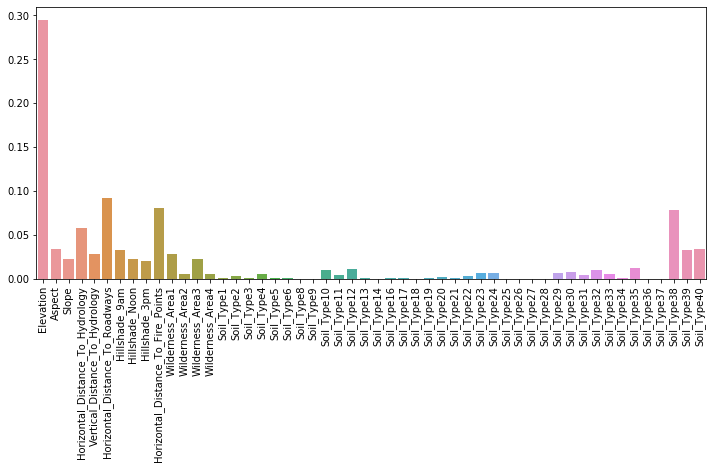

In [25]:

from sklearn.tree import DecisionTreeRegressor
fig,ax=plt.subplots(figsize = (12,5))
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
df= pd.DataFrame(columns=['Feature','Score'])

for i,v in enumerate(importance):
    print(str(X_train.columns[i])+ ', Score: ' + str(v))
    row = [str(X_train.columns[i]),v]
    df.loc[len(df)] = row

# plot feature importance
ax = sns.barplot([x for x in range(len(importance))], importance)
a=ax.get_xticks().tolist()

a = list(X_train.columns)
ax.set_xticklabels(a, rotation = 90)
plt.show()

In [26]:
df.sort_values(by=['Score'], ascending = False)

,Feature,Score
0,Elevation,0.294853
5,Horizontal_Distance_To_Roadways,0.092282
9,Horizontal_Distance_To_Fire_Points,0.081016
49,Soil_Type38,0.078186
3,Horizontal_Distance_To_Hydrology,0.057643
1,Aspect,0.034016
51,Soil_Type40,0.033528
6,Hillshade_9am,0.032681
50,Soil_Type39,0.032679
4,Vertical_Distance_To_Hydrology,0.028649


In [27]:
df = df[df['Score'] > 0.01]
feat_list = list(df["Feature"].unique())

X_train_subset = X_train.drop(columns=[col for col in X_train if col not in feat_list])
X_val_subset = X_val.drop(columns=[col for col in X_val if col not in feat_list])

In [28]:

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train,y_train)
result = model.score(X_val, y_val)
print(result)
model.fit(X_train_subset,y_train) 
result_subset = model.score(X_val_subset, y_val)
print(result_subset)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6038359788359788


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.58994708994709


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
result = model.score(X_val, y_val)
print(result)
model.fit(X_train_subset,y_train) 
result_subset = model.score(X_val_subset, y_val)
print(result_subset)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_sta

0.7658730158730159


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

0.746031746031746


In [30]:
from xgboost import XGBClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
result = model.score(X_val, y_val)
print(result)
model.fit(X_train_subset,y_train) 
result_subset = model.score(X_val_subset, y_val)
print(result_subset)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 

0.7658730158730159


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

0.746031746031746


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 42)
model.fit(X_train,y_train)
result = model.score(X_val, y_val)
print(result)
model.fit(X_train_subset,y_train) 
result_subset = model.score(X_val_subset, y_val)
print(result_subset)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 

0.798941798941799


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.7705026455026455


Our best model is that of ExtraTreeClassifer

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [55]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32,64] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [61]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='precision_micro', n_jobs=2)
helper2 = EstimatorSelectionHelper(models1, params1)
helper2.fit(X_train_subset, y_train, scoring='precision_micro', n_jobs=2)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    2.4s finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   23.9s finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:  3.7min finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=2)]: Done   9 out of   9 | elapsed:    3.3s finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    2.4s finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:   18.1s finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify 

Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:  1.7min finished
C:\Users\johnl\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [62]:
helper1.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
GradientBoostingClassifier
SVC


,estimator,min_score,mean_score,max_score,std_score,n_estimators,learning_rate,C,kernel,gamma
2,ExtraTreesClassifier,0.829327,0.838698,0.849173,0.00814,64,NaN,NaN,NaN,NaN
1,ExtraTreesClassifier,0.824917,0.834729,0.842117,0.007228,32,NaN,NaN,NaN,NaN
4,RandomForestClassifier,0.824697,0.830909,0.83903,0.006005,32,NaN,NaN,NaN,NaN
0,ExtraTreesClassifier,0.819524,0.824663,0.833517,0.006288,16,NaN,NaN,NaN,NaN
3,RandomForestClassifier,0.810805,0.81893,0.825579,0.006121,16,NaN,NaN,NaN,NaN
6,GradientBoostingClassifier,0.768467,0.772266,0.776185,0.003152,32,0.8,NaN,NaN,NaN
8,GradientBoostingClassifier,0.677611,0.714735,0.767365,0.038247,32,1.0,NaN,NaN,NaN
5,GradientBoostingClassifier,0.748401,0.759772,0.766417,0.008078,16,0.8,NaN,NaN,NaN
7,GradientBoostingClassifier,0.673865,0.707679,0.75656,0.035401,16,1.0,NaN,NaN,NaN
10,SVC,0.696582,0.708037,0.720141,0.009629,NaN,NaN,10,linear,NaN


We can see that ExtraTreesClassifier is our best model